<a href="https://colab.research.google.com/github/RMYazdi/ASL-detection/blob/master/main_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Google Collab Drive
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from google.colab import drive
drive.mount('/content/drive')

Found GPU at: /device:GPU:0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#unzipe dataset 


import zipfile
from google.colab import drive
zip_ref = zipfile.ZipFile("/content/drive/My Drive/asl-alphabet.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:


import keras
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


imageSize=50




Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
# create data map  (you can skip data map generation if you have already had array data . Then, they we'll be loaded in the following))

train_dir = "/tmp/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"


test_dir =  "/tmp/asl-alphabet/asl_alphabet_test/asl_alphabet_test/"
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
#             elif folderName in ['nothing']:
#                 label = 27
            elif folderName in ['space']:
                label = 27           

            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir) 





In [ ]:
# # save data in array foramt

# np.save('/content/drive/My Drive/ASL_project/X_train', X_train)
# np.save('/content/drive/My Drive/ASL_project/X_test', X_test)
# np.savetxt('/content/drive/My Drive/ASL_project/y_train.txt', y_train, fmt='%d')
# np.savetxt('/content/drive/My Drive/ASL_project/y_test.txt', y_test, fmt='%d')
# np.savetxt('/content/drive/My Drive/ASL_project/y_trainHot.txt', y_trainHot, fmt='%d')
# np.savetxt('/content/drive/My Drive/ASL_project/y_testHot.txt', y_testHot, fmt='%d')

 
# load data in array format (you can skip data map generation if you have already had array data)

X_train=np.load('/content/drive/My Drive/ASL_project/X_train.npy')
X_test=np.load('/content/drive/My Drive/ASL_project/X_test.npy')
y_train=np.loadtxt('/content/drive/My Drive/ASL_project/y_train.txt',dtype=int)
y_test=np.loadtxt('/content/drive/My Drive/ASL_project/y_test.txt', dtype=int)
y_trainHot=np.loadtxt('/content/drive/My Drive/ASL_project/y_trainHot.txt', dtype=int)
y_testHot=np.loadtxt('/content/drive/My Drive/ASL_project/y_testHot.txt', dtype=int)





In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

# one-hot encoding
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 28)
y_testHot = to_categorical(y_test, num_classes = 28)


print(X_train.shape)
print(X_test.shape)




(53760, 50, 50, 3)
(13440, 50, 50, 3)


In [ ]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'space'}


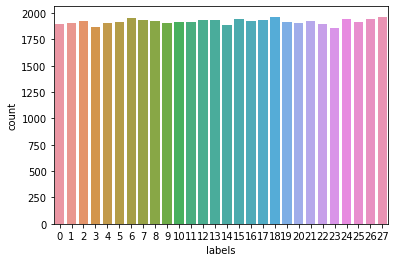

In [ ]:
#creating label_map

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'space'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)



In [ ]:

# Defining Model Structure
data_dir = '/tmp/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
target_size = (50, 50)
target_dims = (50, 50, 3) # add channel for RGB
n_classes = 28


map_characters1 = map_characters
optimizer1 = keras.optimizers.Adam(lr=0.001)
# optimizer2 = keras.optimizers.RMSprop(lr=0.0001)

def pretrainedNetwork(xtrain,ytrain,xtest,ytest,numclasses,numepochs,optimizer,labels):
    my_model = Sequential()
    my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
    my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
    my_model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
    my_model.add(BatchNormalization()) 

    my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
    my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
    my_model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
    my_model.add(BatchNormalization()) 

    my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
    my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
    my_model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))


    my_model.add(Flatten())
    my_model.add(BatchNormalization()) 
    my_model.add(Dense(512, activation='relu'))
    my_model.add(Dense(n_classes, activation='softmax'))

    optimizer= keras.optimizers.Adam(lr=0.001)
    my_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

    my_model.summary()




    # Fit model
    history = my_model.fit(xtrain,ytrain, epochs=numepochs, validation_data=(xtest,ytest), verbose=1,callbacks = callbacks_list)
    my_model.save('/content/drive/My Drive/final_asl_scratch.h5')



    print('****** Train set evaluation .....\n ')
    # Evaluate model on train data
    score = my_model.evaluate(xtrain,ytrain, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
    y_pred = my_model.predict(xtrain)
    print('\n', sklearn.metrics.classification_report(np.where(ytrain > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(ytrain,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plotKerasLearningCurve(allow_pickle=False)
    plt.show()
    plot_learning_curve(history)
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
    plt.show()



    print('****** Test set evaluation .....\n ')

    # Evaluate on model test data
    score = my_model.evaluate(xtest,ytest, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
    y_pred = my_model.predict(xtest)
    print('\n', sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(ytest,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plotKerasLearningCurve(allow_pickle=False)
    plt.show()

    plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
    plt.show()


    return my_model



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 47, 47, 64)        3136      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 22, 22, 64)        65600     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 22, 22, 64)        256       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 19, 19, 128)       131200    
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 8, 8, 128)         262272    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 128)        

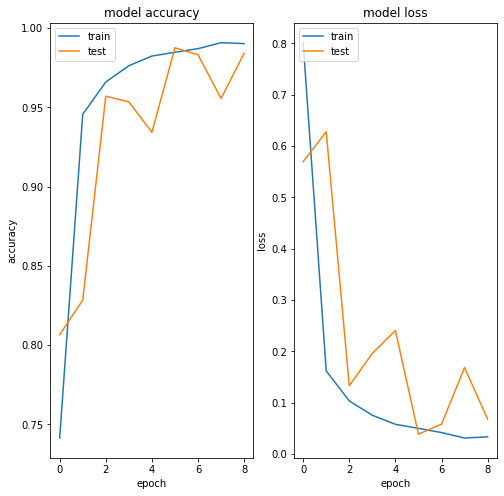

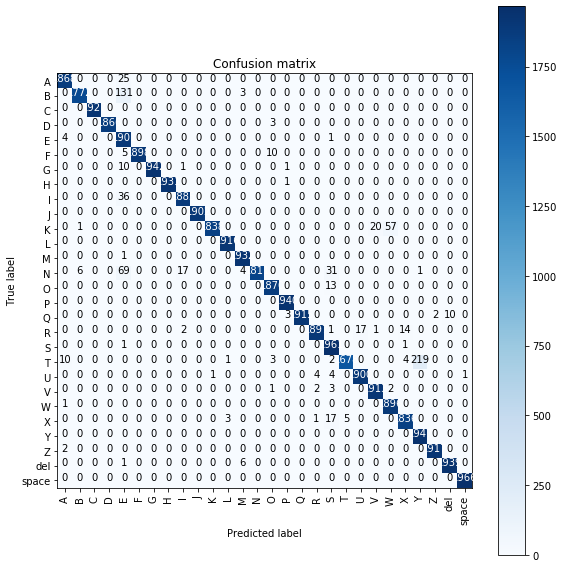

****** Test set evaluation .....
 

Keras CNN - accuracy: 0.984077380952381 


              precision    recall  f1-score   support

           A       0.98      1.00      0.99       471
           B       1.00      0.93      0.96       500
           C       1.00      1.00      1.00       493
           D       1.00      1.00      1.00       487
           E       0.88      1.00      0.94       463
           F       1.00      1.00      1.00       459
           G       1.00      1.00      1.00       455
           H       1.00      1.00      1.00       463
           I       0.99      0.98      0.98       455
           J       1.00      1.00      1.00       488
           K       1.00      0.96      0.98       497
           L       1.00      1.00      1.00       477
           M       0.99      1.00      1.00       504
           N       1.00      0.95      0.97       464
           O       0.99      1.00      0.99       515
           P       0.99      1.00      0.99       477
  

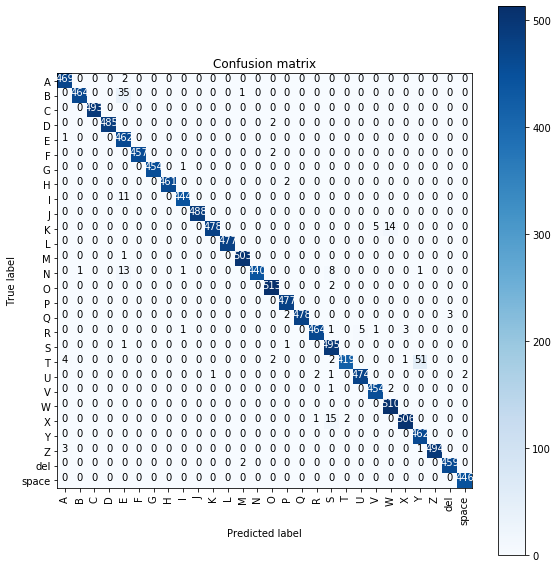

In [ ]:
model_structure=pretrainedNetwork(X_train, y_trainHot, X_test, y_testHot,28,20,optimizer1,map_characters1)


In [ ]:
freezed_model=tf.keras.models.load_model('/content/drive/My Drive/final_asl_scratch.h5')


In [ ]:
# Visualize model structure 
from keras.utils import plot_model
plot_model(freezed_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)






In [ ]:
#visulalize layers output
from keras.models import Model
layer_outputs = [layer.output for layer in model_structure.layers]
activation_model = Model(inputs=model_structure.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[14].reshape(1,50,50,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
        


display_activation(activations, 8, 8, 2)
